# 多項式関数の直観的な可視化

$y = x^3$ をグラフで見ると「Ｓ字曲線」のようになります。なぜこうなるのかを可視化して、直観的に理解してみましょう。

<img src="img/polynomial_functions1.gif" alt="Description of GIF" style="width:800px;"/>

まずは原点から右側の曲線を考えると、ｘが正の値として大きくなるにつれて、各辺の長さも当然大きくなり、それに伴って立方体の体積も増加します。グラフ上では上に伸びる形となります。

一方、原点から左側の曲線では、ｘは負の値となります。ここで注意すべきは、立方体の「大きさ」（つまり辺の長さ）は常に正の量として増加するのですが、ｘ自体が負であるため、立方体は「ネガティブな立方体」になります。体積に対応するｙの値が負のなので、透けて見える色で描かれています。

以下はアニメーションを作成するコードです。

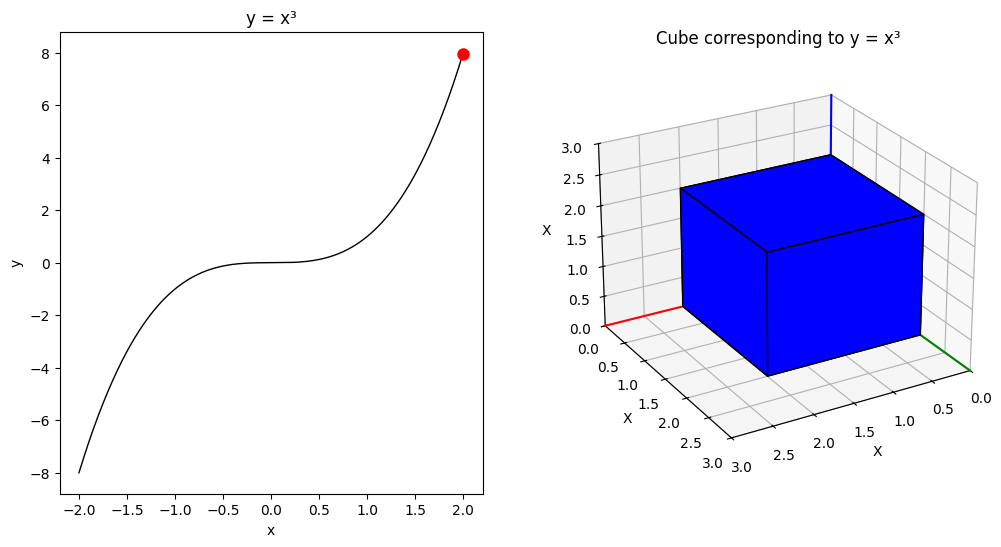

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def draw_cube(ax, L, color, alpha):
    vertices = np.array([[0, 0, 0],
                         [L, 0, 0],
                         [L, L, 0],
                         [0, L, 0],
                         [0, 0, L],
                         [L, 0, L],
                         [L, L, L],
                         [0, L, L]])
    faces = [[vertices[j] for j in [0, 1, 2, 3]],
             [vertices[j] for j in [4, 5, 6, 7]],
             [vertices[j] for j in [0, 1, 5, 4]],
             [vertices[j] for j in [2, 3, 7, 6]],
             [vertices[j] for j in [1, 2, 6, 5]],
             [vertices[j] for j in [0, 3, 7, 4]]]
    
    cube = Poly3DCollection(faces, facecolors=color, alpha=alpha, edgecolor='k')
    ax.add_collection3d(cube)
    return cube

# 図とサブプロットの準備（左：2D、右：3D）
fig = plt.figure(figsize=(12, 6))
ax2d = fig.add_subplot(1, 2, 1)
ax3d = fig.add_subplot(1, 2, 2, projection='3d')

# 2Dプロット：y = x³ のグラフ
x_vals = np.linspace(-2, 2, 400)
y_vals = x_vals ** 3
ax2d.plot(x_vals, y_vals, 'k-', linewidth=1)
ax2d.set_xlabel("x")
ax2d.set_ylabel("y")
ax2d.set_title("y = x³")
point, = ax2d.plot([], [], 'ro', markersize=8)

# 3Dプロットの設定と軸線の描画
ax3d.set_xlim(0, 3)
ax3d.set_ylim(0, 3)
ax3d.set_zlim(0, 3)
ax3d.set_xlabel("X")
ax3d.set_ylabel("X")
ax3d.set_zlabel("X")
ax3d.view_init(elev=25, azim=60)
ax3d.set_title("Cube corresponding to y = x³")
ax3d.plot([0, 3], [0, 0], [0, 0], 'r-')  # x軸
ax3d.plot([0, 0], [0, 3], [0, 0], 'g-')  # y軸
ax3d.plot([0, 0], [0, 0], [0, 3], 'b-')  # z軸

# 前回描画した立方体を保持するグローバル変数
cube_art = None

def update(frame):
    global cube_art
    t = frame / frames * 2 * np.pi
    x = 2 * np.cos(t)
    y = x ** 3  # y = x³

    # 修正箇所：x, y はリストにして渡す
    point.set_data([x], [y])

    # 以前の立方体があれば削除
    if cube_art is not None:
        cube_art.remove()

    L = abs(x) if abs(x) > 0.01 else 0.01

    if y >= 0:
        cube_color = 'blue'
        cube_alpha = 1.0
    else:
        cube_color = 'blue'
        cube_alpha = 0.1

    cube_art = draw_cube(ax3d, L, cube_color, cube_alpha)
    return point, cube_art

frames = 100
anim = FuncAnimation(fig, update, frames=frames, interval=100, blit=False)

anim.save("polynomial_functions1.gif", writer=PillowWriter(fps=10))
plt.show()
